# 1. Confusion Matrix

- [참고 03_통계](../0_basics/03_통계.ipynb)
    
    |  | 예측 값 (False) | 예측 값(True) |
    | --- | --- | --- |
    | 실제 값(False) | TN | FP |
    | 실제 값(True) | FN | TP |
    
    <br>
    
    - **True Positive (TP)**: 모델이 Positive로 예측하고 실제로 Positive인 경우
    - **True Negative (TN)**: 모델이 Negative로 예측하고 실제로 Negative인 경우
    - **False Positive (FP)**: 모델이 Positive로 예측했지만 실제로는 Negative인 경우
    - **False Negative (FN)**: 모델이 Negative로 예측했지만 실제로는 Positive인 경우

- accuracy : 일반적인 총합에 대한 정확도
    
    $$
    \frac{ \text{TP} + \text{TN} }{\text{TN} + \text{FP} + \text{FN} + \text{TP}}
    $$
    
- Precision: 실제 값이 더 중요한 경우
    
    $$
    \frac{\text{TP}}{\text{FP} + \text{TP}}
    $$
    
- Recall:  예측 값이 더 중요한 경우
    
    $$
    \frac{\text{TP}}{\text{FN} + \text{TP}}
    $$
    
- 예시 :
    - Covid 검사
        
        
        |  | 음성 판정 | 양성 판정 |
        | --- | --- | --- |
        | 건강함 | **TN (80)** | FP (8)
        건강한데 오진 |
        | Covid | **FN (6)**
        환자인데 오진 | **TP (90)** |
            
        <br>
    
        - $Precision = \frac{90}{8 + 90} = \frac{90}{98} \approx 0.918$
        - $Recall = \frac{90}{6 + 90} = \frac{90}{96} \approx 0.938$
        - $Precision$ 을 더 중요하게 보는 경우, 정상적인 사람이 격리될 위험이 있고
        - $Recall$ 을 더 중요하게 보는 경우, 코로나 걸린 사람이 거리를 돌아다니며 병을 퍼트릴 위험이 있다.
    - 암 환자
        
        
        |  | 음성 판정 | 양성 판정 |
        | --- | --- | --- |
        | 건강함 | TN | FP
        건강한데 오진 |
        | 악성 암 | **FN (20)**
        환자인데 오진 | **TP (80)** |
            
        <br>
    
        - 이 경우 **Recall** 값을 계산한다. 환자인데 오진할 경우 큰 위험이 있기 때문
            
            $$
            \text{Recall} = \frac{20}{80+20} = 0.200
            $$
            

# 2. 평균의 종류

- 산술 평균
    
    $$
    A(x) = \frac{\sum_{i=1}^{n}x_i}{n}
    $$
    
- 기하 평균
    
    $$
    G(x) = \left( \prod_{i=1}^{n} a_i \right)^{\frac{1}{n}} = \sqrt{a_1 \cdot a_2 ... \space a_n }
    
    $$
    
- 조화 평균
    
    $$
    H(x) = \frac{n}{\sum^{n}_{n=i} \frac{1}{x_i}}
    $$
    
- n 이 2 일 때의 조화 평균 ($\text{f1-Score}$)
    
    $$
    H(x) = \text{f1-Score} = \frac{n}{\sum^{n}_{n=i} \frac{1}{x_i}} = \frac{2}{\frac{1}{x_1} + \frac{1}{x_2}} = \frac{2}{\frac{x_1 + x_2}{x_1 \cdot x_2}} = 2 \frac{x_1 \cdot x_2}{x_1 + x_2} = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} 
    $$


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

# 컨퓨전 매트릭스 confusion_matrix
# 프리시전 리콜을 계산해준다 classification_report
from sklearn.metrics import confusion_matrix, classification_report # 9강과 차이

import xgboost
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [22]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("../../data/heart.csv")

X = data.drop(columns="output")
y = data["output"]

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

- knn

In [23]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print('The accuracy of the KNN is', metrics.accuracy_score(pred_knn, y_test))

The accuracy of the KNN is 0.6593406593406593


- DT

In [24]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(x_train, y_train)
pred_tree = tree.predict(x_test)
print('The accuracy of the DT is', metrics.accuracy_score(pred_tree, y_test))

The accuracy of the DT is 0.7362637362637363


- RFC

In [25]:
rfc_best = RandomForestClassifier(n_estimators = 200, 
                               oob_score = True,
                               random_state = 209,
                               max_depth = 3, 
                               max_features = None, 
                               min_samples_leaf = 7,
                               min_samples_split = 6)

rfc_best.fit(x_train, y_train)
pred_rfc = rfc_best.predict(x_test)
print('The accuracy of the RFC is', 
      metrics.accuracy_score(pred_rfc, y_test))

The accuracy of the RFC is 0.8241758241758241


- XGBoost

In [26]:
xgb_best = XGBClassifier(booster = "gbtree", 
                    objective = "binary:logistic",
                    learning_rate = 0.0301, 
                    max_depth = 3, 
                    n_estimators = 250)

xgb_best.fit(x_train, y_train)
pred_xgb = xgb_best.predict(x_test)
print('The accuracy of the XGBoost is', 
      metrics.accuracy_score(pred_xgb, y_test))

The accuracy of the XGBoost is 0.8241758241758241


### 신경망

13

In [29]:
# 입력노드 수 = feature 수
input_node = len(X.columns)
# 출력노드 수
output_node = 1

#모델
dnn = Sequential(name = "hr_classifier")
dnn.add(Dense(output_node,
              kernel_initializer='he_normal',
              activation = "sigmoid",
              input_shape=(input_node,)
             ))

/home/tommy/miniconda3/envs/p311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
adam = Adam(learning_rate=0.0005)

dnn.compile(loss='binary_crossentropy',
            optimizer=adam,
            metrics = ['accuracy'])

# validation loss가 연속 3번 감소하지 않으면 조기종료
early_stopping = EarlyStopping(patience = 3,
                               restore_best_weights=True)

In [31]:
dnn_hist = dnn.fit(x_train, 
                   y_train,
                   epochs=40, 
                   batch_size=16, 
                   validation_split=0.2,
                   callbacks=[early_stopping]
                  )

Epoch 1/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5527 - loss: 24.0881 - val_accuracy: 0.5116 - val_loss: 27.5751
Epoch 2/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5093 - loss: 25.3198 - val_accuracy: 0.5116 - val_loss: 26.1309
Epoch 3/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5670 - loss: 21.0815 - val_accuracy: 0.5116 - val_loss: 24.6881
Epoch 4/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5683 - loss: 19.1917 - val_accuracy: 0.5116 - val_loss: 23.2250
Epoch 5/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5690 - loss: 18.2912 - val_accuracy: 0.5116 - val_loss: 21.7763
Epoch 6/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5610 - loss: 16.0001 - val_accuracy: 0.5116 - val_loss: 20.3439
Epoch 7/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 15.2396 - val_accuracy: 0.5116 - val_loss: 18.8713
Epoch 8/40
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5642 - loss: 15.3021 - val_accuracy: 0.

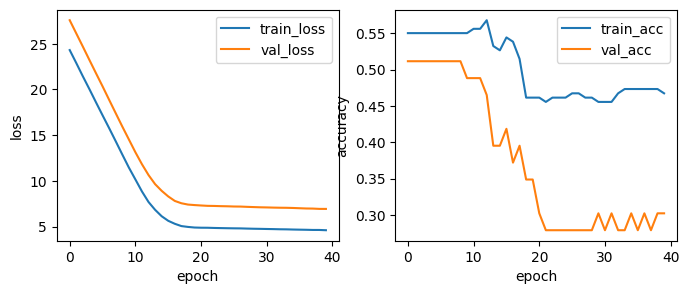

In [32]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize = (8,3))

ax_loss.plot(dnn_hist.history["loss"], label="train_loss")
ax_loss.plot(dnn_hist.history["val_loss"], label="val_loss")
ax_loss.set(xlabel = "epoch", ylabel = "loss")
ax_loss.legend()

ax_acc.plot(dnn_hist.history["accuracy"], label="train_acc")
ax_acc.plot(dnn_hist.history["val_accuracy"], label="val_acc")
ax_acc.set(xlabel = "epoch", ylabel = "accuracy")
ax_acc.legend();

In [40]:
pred_dnn = dnn.predict(x_test).flatten() >= 0.5
print('The accuracy of the ANN is', 
      metrics.accuracy_score(pred_dnn, y_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
The accuracy of the ANN is 0.3516483516483517


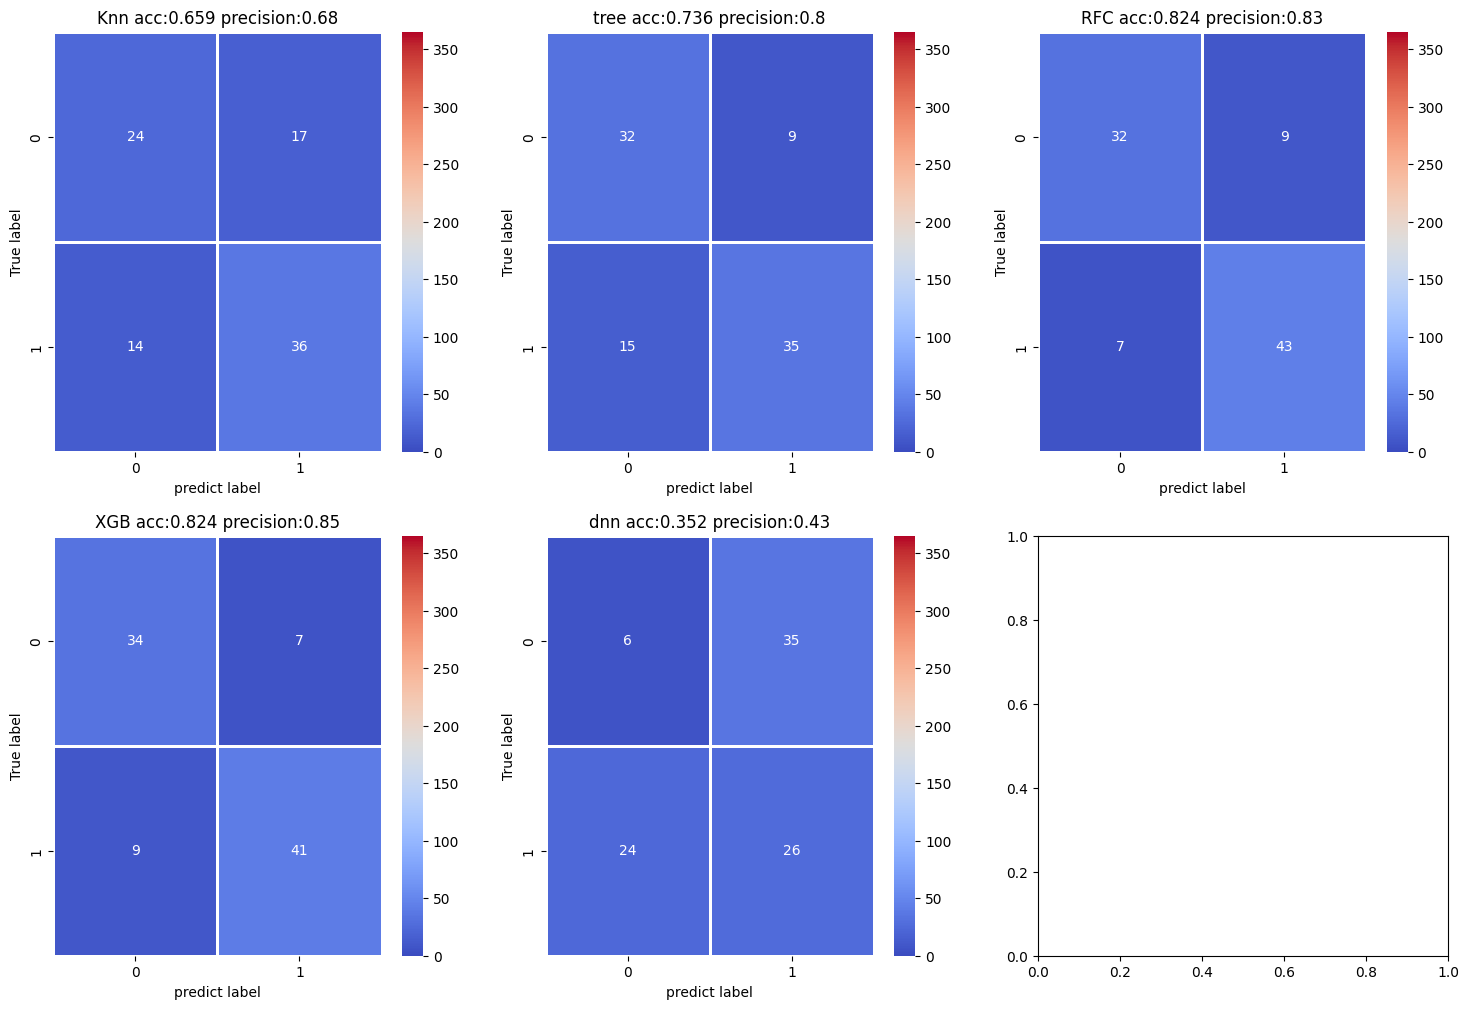

In [45]:
fig, axes = plt.subplots(2,3, figsize = (18,12))

pred_dict = {
               "Knn" : pred_knn,
               "tree": pred_tree,
               "RFC" : pred_rfc,
               "XGB" : pred_xgb,
               "dnn" : pred_dnn
             }

for name, ax in zip (pred_dict.keys(), axes.flat):
    matrix = pred_dict[name]
    acc = round(metrics.accuracy_score(matrix, y_test), 3)
    recall = round(metrics.precision_score(y_test, matrix), 2)

    sns.heatmap(data = confusion_matrix(y_test, matrix),
                cmap="coolwarm",
                linecolor="white",
                linewidths=1,
                annot=True,
                vmax=365, 
                vmin=0,
                ax=ax)
    title = f"{name} acc:{acc} precision:{recall}"
    ax.set(xlabel = "predict label", ylabel = "True label", title = title)


In [43]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



$$\text{weighted avg} = \frac{41}{91} \times 0.68 +\frac{50}{91} \times 0.80 = \frac{41}{91} \times 0.78 +\frac{50}{91} \times 0.70 = 0.746$$
$$$$

$$\text{f1-score}_0 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.68 \times 0.78}{0.68 + 0.78} = 0.73$$
$$\text{f1-score}_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.80 \times 0.70}{0.80 + 0.70} = 0.74$$

Certainly! Let's calculate each metric based on the confusion matrix numbers as suggested by the performance metrics in your image.

For the class with label 0:
- True Positives (TP) = 32
- False Negatives (FN) = 9
- False Positives (FP) = 10

For the class with label 1:
- True Positives (TP) = 35
- False Negatives (FN) = 15
- False Positives (FP) = 7

## Class 0

### Precision
$$
\text{Precision}_0 = \frac{32}{32 + 10} = 0.68
$$

### Recall
$$
\text{Recall}_0 = \frac{32}{32 + 9} = 0.78
$$

### F1-Score
$$
\text{F1}_0 = 2 \times \frac{0.68 \times 0.78}{0.68 + 0.78} \approx 0.73
$$

## Class 1

### Precision
$$
\text{Precision}_1 = \frac{35}{35 + 7} = 0.80
$$

### Recall
$$
\text{Recall}_1 = \frac{35}{35 + 15} = 0.70
$$

### F1-Score
$$
\text{F1}_1 = 2 \times \frac{0.80 \times 0.70}{0.80 + 0.70} \approx 0.74
$$

## Overall Metrics

### Accuracy
$$
\text{Accuracy} = \frac{32 + 35}{91} \approx 0.74
$$

### Macro Average
$$
\text{Macro Precision} = \frac{0.68 + 0.80}{2} = 0.74
$$

$$
\text{Macro Recall} = \frac{0.78 + 0.70}{2} = 0.74
$$

$$
\text{Macro F1-Score} = \frac{0.73 + 0.74}{2} = 0.74
$$

### Weighted Average

For weighted averages, use the support values to weigh each metric for precision, recall, and F1-score.

$$
\text{Weighted Precision} = \frac{(0.68 \times 41) + (0.80 \times 50)}{91} = 0.74
$$

$$
\text{Weighted Recall} = \frac{(0.78 \times 41) + (0.70 \times 50)}{91} = 0.74
$$

$$
\text{Weighted F1-Score} = \frac{(0.73 \times 41) + (0.74 \times 50)}{91} \approx 0.74
$$

These calculations match the metrics shown in your image.